# **Fashion MNIST Image Classification - NN vs CNN**
## Developed By: **Md. Shoaib Ahmed**

## Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("\n Dataset loaded !")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 Dataset loaded !


## Data Preprocessing

In [ ]:
# Normalization [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape NN
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Reshape CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Plot Function - Sample Predictions

In [ ]:
def plot_sample_predictions(model, x_data, y_true, flat=True, num_samples=5):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(range(len(x_data)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        img = x_data[idx].reshape(28, 28)
        actual = class_names[y_true[idx]]
        pred = class_names[np.argmax(model.predict(np.expand_dims(x_data[idx], axis=0)))]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Pred: {pred}\nTrue: {actual}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Plot Function - Training History

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Neural Network (NN)

### NN Model Build

In [ ]:
nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### NN Model Architecture

In [ ]:
print("\nNN Model Architecture:")
nn_model.summary()


NN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

### NN Model Train

In [ ]:
history_nn = nn_model.fit(x_train_flat, y_train_cat, epochs=15, batch_size=128,
                          validation_split=0.1, verbose=2)

Epoch 1/15
422/422 - 6s - 15ms/step - accuracy: 0.7839 - loss: 0.6160 - val_accuracy: 0.8462 - val_loss: 0.4186
Epoch 2/15
422/422 - 1s - 3ms/step - accuracy: 0.8476 - loss: 0.4235 - val_accuracy: 0.8640 - val_loss: 0.3751
Epoch 3/15
422/422 - 1s - 3ms/step - accuracy: 0.8621 - loss: 0.3842 - val_accuracy: 0.8673 - val_loss: 0.3744
Epoch 4/15
422/422 - 1s - 3ms/step - accuracy: 0.8701 - loss: 0.3586 - val_accuracy: 0.8647 - val_loss: 0.3561
Epoch 5/15
422/422 - 1s - 3ms/step - accuracy: 0.8745 - loss: 0.3416 - val_accuracy: 0.8787 - val_loss: 0.3376
Epoch 6/15
422/422 - 1s - 2ms/step - accuracy: 0.8792 - loss: 0.3304 - val_accuracy: 0.8807 - val_loss: 0.3303
Epoch 7/15
422/422 - 1s - 2ms/step - accuracy: 0.8840 - loss: 0.3162 - val_accuracy: 0.8702 - val_loss: 0.3522
Epoch 8/15
422/422 - 1s - 3ms/step - accuracy: 0.8873 - loss: 0.3088 - val_accuracy: 0.8847 - val_loss: 0.3143
Epoch 9/15
422/422 - 1s - 2ms/step - accuracy: 0.8888 - loss: 0.2973 - val_accuracy: 0.8822 - val_loss: 0.3165


### NN Model Evaluation

In [ ]:
loss_nn, acc_nn = nn_model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"\n Neural Network (NN) Test Accuracy: {acc_nn:.4f}")


 Neural Network (NN) Test Accuracy: 0.8830


### NN Sample Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


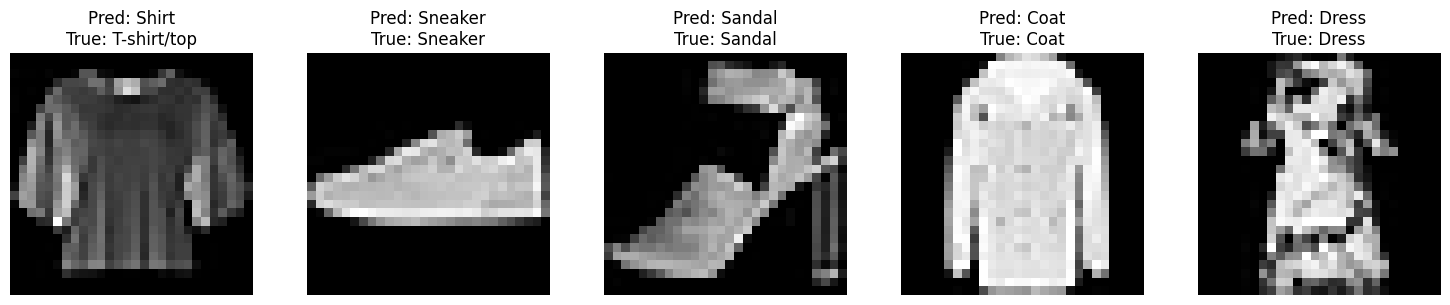

In [ ]:
plot_sample_predictions(nn_model, x_test_flat, y_test)

### NN Training History

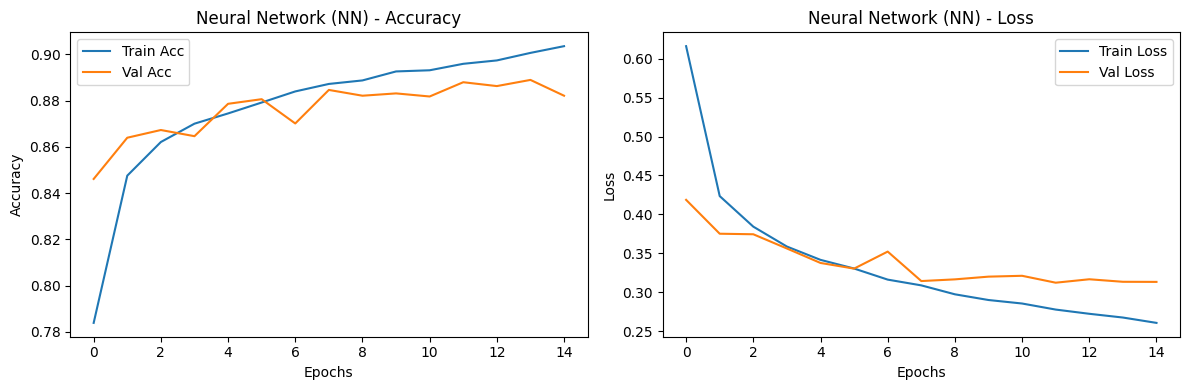

In [ ]:
plot_history(history_nn, "Neural Network (NN)")

## Convolutional Neural Network (CNN)

### CNN Model Build

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### CNN Model Architecture

In [ ]:
print("\nCNN Model Architecture:")
cnn_model.summary()


CNN Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

### CNN Model Train

In [ ]:
history_cnn = cnn_model.fit(x_train_cnn, y_train_cat, epochs=15, batch_size=128,
                            validation_split=0.1, verbose=2)

Epoch 1/15
422/422 - 8s - 20ms/step - accuracy: 0.7512 - loss: 0.6870 - val_accuracy: 0.8370 - val_loss: 0.4422
Epoch 2/15
422/422 - 5s - 11ms/step - accuracy: 0.8462 - loss: 0.4343 - val_accuracy: 0.8747 - val_loss: 0.3447
Epoch 3/15
422/422 - 2s - 4ms/step - accuracy: 0.8660 - loss: 0.3757 - val_accuracy: 0.8825 - val_loss: 0.3160
Epoch 4/15
422/422 - 2s - 4ms/step - accuracy: 0.8767 - loss: 0.3465 - val_accuracy: 0.8905 - val_loss: 0.3032
Epoch 5/15
422/422 - 2s - 4ms/step - accuracy: 0.8859 - loss: 0.3222 - val_accuracy: 0.8968 - val_loss: 0.2861
Epoch 6/15
422/422 - 3s - 7ms/step - accuracy: 0.8898 - loss: 0.3029 - val_accuracy: 0.8972 - val_loss: 0.2766
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.8974 - loss: 0.2873 - val_accuracy: 0.9010 - val_loss: 0.2701
Epoch 8/15
422/422 - 3s - 6ms/step - accuracy: 0.9016 - loss: 0.2738 - val_accuracy: 0.9040 - val_loss: 0.2621
Epoch 9/15
422/422 - 3s - 6ms/step - accuracy: 0.9061 - loss: 0.2611 - val_accuracy: 0.9075 - val_loss: 0.2641

### CNN Model Evaluation

In [ ]:
loss_cnn, acc_cnn = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"\n Convolutional Neural Network (CNN) Test Accuracy: {acc_cnn:.4f}")


 Convolutional Neural Network (CNN) Test Accuracy: 0.9038


### CNN Sample Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


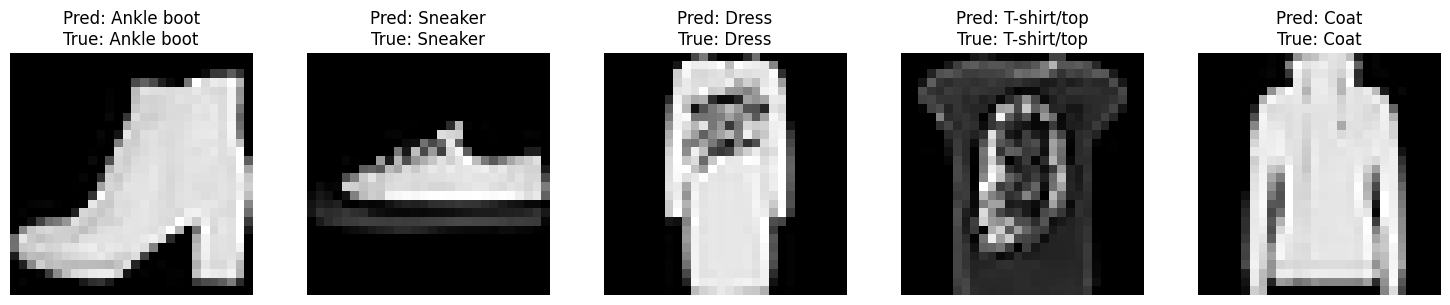

In [ ]:
plot_sample_predictions(cnn_model, x_test_cnn, y_test, flat=False)

### CNN Training History

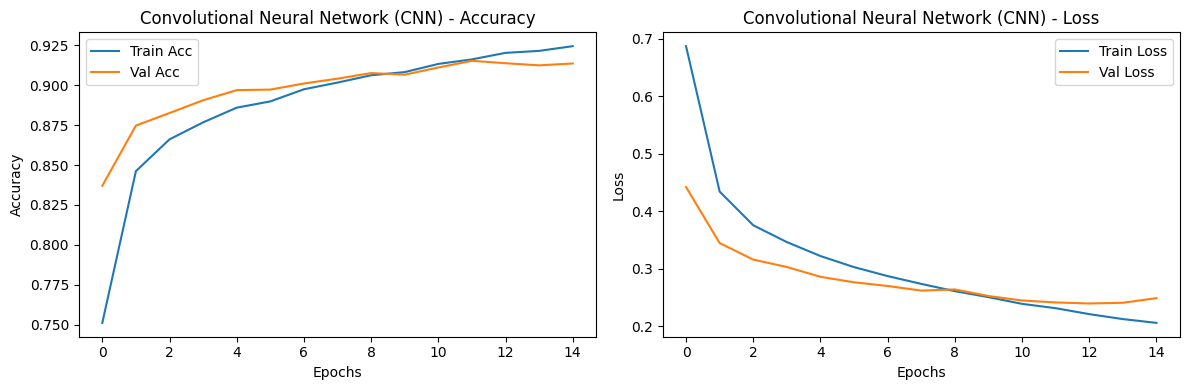

In [ ]:
plot_history(history_cnn, "Convolutional Neural Network (CNN)")

## Model (NN & CNN) Comparison Summary

In [ ]:
print("\n Accuracy Comparison:")
print(f"NN Accuracy  : {acc_nn:.4f}")
print(f"CNN Accuracy : {acc_cnn:.4f}")
print(f"CNN outperformed NN by {(acc_cnn - acc_nn) * 100:.2f}%")


 Accuracy Comparison:
NN Accuracy  : 0.8830
CNN Accuracy : 0.9038
CNN outperformed NN by 2.08%


## Classification Reports - (NN & CNN)

In [ ]:
print("\nNN Classification Report:")
y_pred_nn = np.argmax(nn_model.predict(x_test_flat), axis=1)
print(classification_report(y_test, y_pred_nn, target_names=class_names))

print("\nCNN Classification Report:")
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)
print(classification_report(y_test, y_pred_cnn, target_names=class_names))


NN Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.86      0.80      1000
       Dress       0.87      0.90      0.89      1000
        Coat       0.82      0.77      0.79      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.77      0.60      0.67      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


CNN Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      

## Plot Function - Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{title} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Confusion Matrix (NN & CNN)

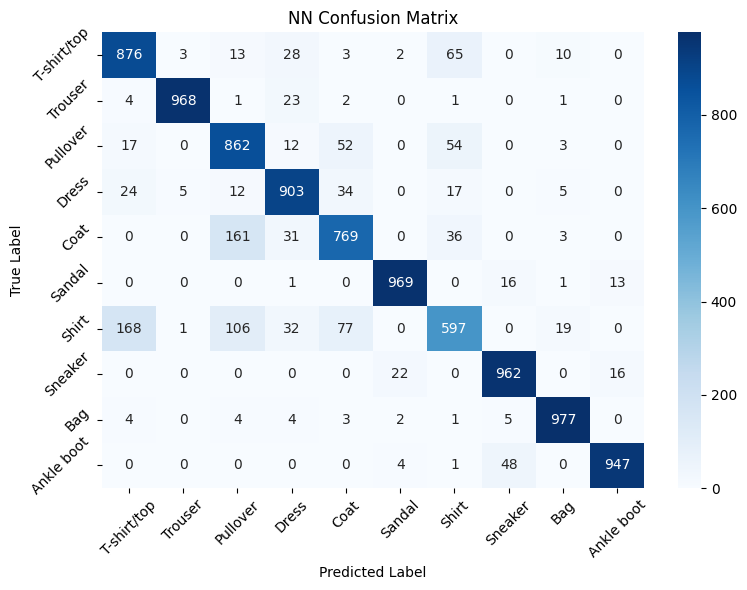

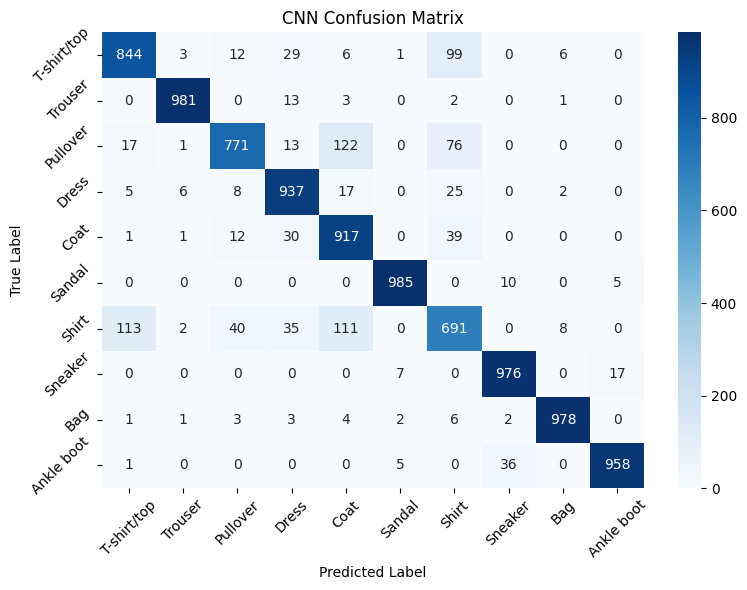

In [ ]:
plot_confusion_matrix(y_test, y_pred_nn, "NN")
plot_confusion_matrix(y_test, y_pred_cnn, "CNN")

In [ ]:
print("\nExplanation:")

print("""
- The CNN model achieved higher accuracy because it leverages spatial features in the images.
- Unlike the NN, which treats each pixel independently after flattening,
  the CNN uses convolutional layers that preserve local patterns such as edges and textures.
- Pooling layers in CNN reduce spatial dimensions and help the network focus on important features.
- This makes CNNs inherently better suited for image data.
- The NN model, while simpler and faster to train, loses spatial context by flattening images.
- Thus, CNN’s ability to capture spatial hierarchies leads to better performance on Fashion MNIST.
""")


Explanation:

- The CNN model achieved higher accuracy because it leverages spatial features in the images.
- Unlike the NN, which treats each pixel independently after flattening,
  the CNN uses convolutional layers that preserve local patterns such as edges and textures.
- Pooling layers in CNN reduce spatial dimensions and help the network focus on important features.
- This makes CNNs inherently better suited for image data.
- The NN model, while simpler and faster to train, loses spatial context by flattening images.
- Thus, CNN’s ability to capture spatial hierarchies leads to better performance on Fashion MNIST.

